Names:

1. Prateek Majumder
2. Neha Roy Choudhury
3. Anshuman Jha
4. Divyakumar Sanghvi
5. Rahul Govind Kumar
6. Ayush Chakraborty
7. Piyush Sunil Borse

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [11]:
df=pd.read_csv("/content/Advertising.csv")

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
# Compute basic statistics
selected_columns = ["TV", "Radio", "Newspaper"]
stats = df[selected_columns].agg(["mean", "std", "sum"])
print("Original Data Statistics:\n", stats)

Original Data Statistics:
                 TV        Radio    Newspaper
mean    147.042500    23.264000    30.554000
std      85.854236    14.846809    21.778621
sum   29408.500000  4652.800000  6110.800000


In [14]:
# Set Differential Privacy parameters
epsilon = 1.0  # Privacy budget
sensitivity = 1.0  # Assumed sensitivity for numeric data

# Function to add Laplace noise
def add_laplace_noise(data, epsilon, sensitivity):
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

# Apply DP 100 times and record statistics
dp_results = {col+"_mean": [] for col in selected_columns}
dp_results.update({col+"_std": [] for col in selected_columns})
dp_results.update({col+"_sum": [] for col in selected_columns})

for _ in range(100):
    dp_data = df[selected_columns].apply(lambda x: add_laplace_noise(x, epsilon, sensitivity))
    dp_stats = dp_data.agg(["mean", "std", "sum"])

    for col in selected_columns:
        dp_results[col+"_mean"].append(dp_stats.loc["mean", col])
        dp_results[col+"_std"].append(dp_stats.loc["std", col])
        dp_results[col+"_sum"].append(dp_stats.loc["sum", col])

# Convert DP results to DataFrame and show summary
dp_results_df = pd.DataFrame(dp_results)
print("\nDP Statistics Summary:\n", dp_results_df.describe())


DP Statistics Summary:
           TV_mean  Radio_mean  Newspaper_mean      TV_std   Radio_std  \
count  100.000000  100.000000      100.000000  100.000000  100.000000   
mean   147.043586   23.251586       30.557922   85.869180   14.932031   
std      0.112390    0.087712        0.102760    0.100703    0.103649   
min    146.798086   22.986785       30.241131   85.597525   14.736935   
25%    146.969793   23.200889       30.496969   85.795840   14.847284   
50%    147.036294   23.259576       30.563609   85.882493   14.927201   
75%    147.119346   23.308875       30.630734   85.935836   14.993350   
max    147.348661   23.455664       30.754570   86.129270   15.197397   

       Newspaper_std        TV_sum    Radio_sum  Newspaper_sum  
count     100.000000    100.000000   100.000000     100.000000  
mean       21.836173  29408.717163  4650.317145    6111.584480  
std         0.112671     22.478009    17.542371      20.552064  
min        21.562309  29359.617212  4597.356913    6048.2

In [15]:
dp_results_df

,TV_mean,Radio_mean,Newspaper_mean,TV_std,Radio_std,Newspaper_std,TV_sum,Radio_sum,Newspaper_sum
0,147.114699,23.259904,30.631045,85.909114,14.863634,21.792626,29422.939816,4651.980812,6126.208950
1,146.964676,23.390107,30.692772,85.908213,14.966792,21.843355,29392.935271,4678.021332,6138.554385
2,147.045527,23.374213,30.631229,85.932513,14.828831,21.939514,29409.105478,4674.842611,6126.245853
3,146.995825,23.168919,30.529593,85.865964,14.992917,21.825696,29399.165088,4633.783808,6105.918579
4,147.014003,23.144592,30.522402,85.783765,14.829283,21.920780,29402.800605,4628.918406,6104.480483
...,...,...,...,...,...,...,...,...,...
95,146.903730,23.141266,30.483483,85.928114,14.797140,21.699896,29380.745909,4628.253117,6096.696502
96,147.219791,23.308410,30.608838,85.732955,14.862439,21.762223,29443.958201,4661.682080,6121.767597
97,147.348661,23.326373,30.649954,85.597525,14.869992,21.856144,29469.732193,4665.274657,6129.990765
98,147.056160,23.361443,30.493421,86.056192,14.911455,21.838449,29411.231909,4672.288524,6098.684220


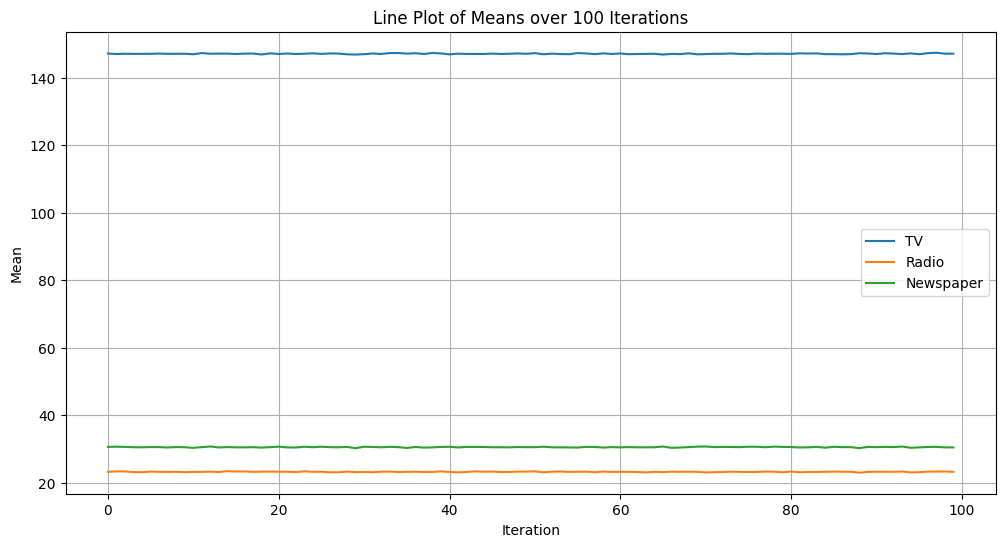

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(dp_results_df["TV_mean"], label="TV")
plt.plot(dp_results_df["Radio_mean"], label="Radio")
plt.plot(dp_results_df["Newspaper_mean"], label="Newspaper")
plt.xlabel("Iteration")
plt.ylabel("Mean")
plt.title("Line Plot of Means over 100 Iterations")
plt.legend()
plt.grid(True)
plt.show()

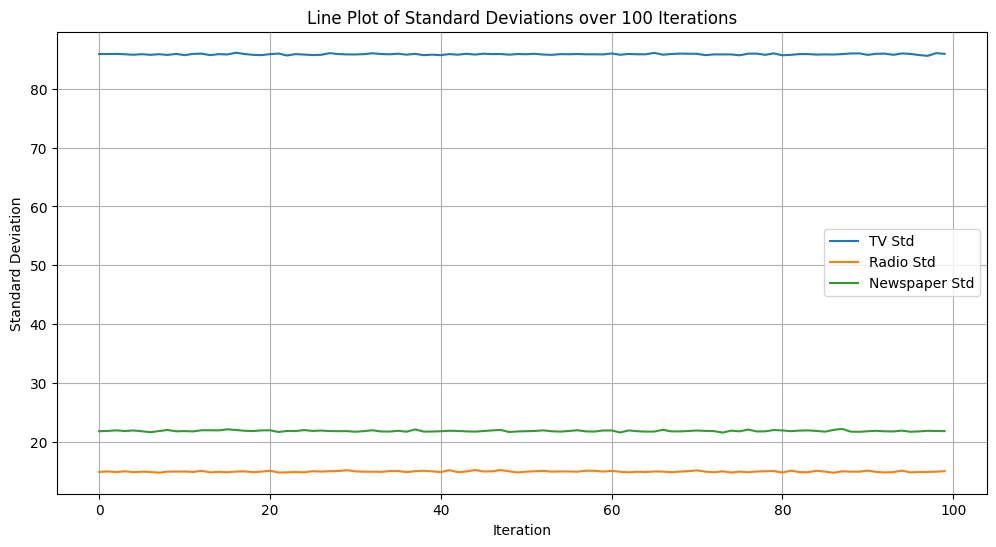

In [17]:
plt.figure(figsize=(12, 6))

# Plot standard deviations
plt.plot(dp_results_df["TV_std"], label="TV Std")
plt.plot(dp_results_df["Radio_std"], label="Radio Std")
plt.plot(dp_results_df["Newspaper_std"], label="Newspaper Std")

plt.xlabel("Iteration")
plt.ylabel("Standard Deviation")
plt.title("Line Plot of Standard Deviations over 100 Iterations")
plt.legend()
plt.grid(True)
plt.show()

Analysis of Data Stability after Applying Differential Privacy:

1. **Mean values remain relatively stable:**  Comparing the descriptive statistics (mean, std, sum) of the original data with the summary statistics of the differentially private data shows that the mean values for TV, Radio, and Newspaper advertising spending do not deviate significantly after applying the Laplace noise. This suggests that the addition of noise did not drastically alter the central tendency of the data.

2. **Standard deviation shows minor increase in some cases:** The standard deviation of the differentially private data is slightly higher than that of the original data across the three advertising channels in some data points. This is expected because introducing Laplace noise increases data variability, as the DP mechanism aims to obscure individual data points while maintaining overall data utility. The small increase suggests a minimal impact on data spread.

3. **Sum values are also stable:** Similar to the mean, the sum of values within each advertising channel are not substantially altered by the differential privacy mechanism.  This indicates the DP process maintains the overall magnitude of the advertising spending, although with some noise added.

4. **Overall data utility preserved:** The analysis points to a relatively low impact of the chosen privacy budget (epsilon) and sensitivity on the data utility. Despite the addition of Laplace noise, the fundamental characteristics of the data, like central tendency, spread and overall magnitude, are preserved. This balance is crucial for maintaining data usability while ensuring a degree of privacy protection.

## Apply Differential Privacy (Laplace noise)

In [18]:
# Prepare data for model training (Sales as target)
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
def apply_dp(data, epsilon=1.0, sensitivity=1.0):
    """Apply Laplace noise for Differential Privacy"""
    noise = np.random.laplace(0, sensitivity / epsilon, data.shape)
    return data + noise

# Apply DP to training data
X_train_dp = apply_dp(X_train)
y_train_dp = apply_dp(y_train.to_numpy().reshape(-1, 1)).flatten()


## Train and Evaluate Models

### 📌 Define Metric Calculation Function

In [20]:
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate a model using R², MAPE, MAE, RMSE"""
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE formula

    print(f"\n📊 {model_name} Performance:")
    print(f"🔹 R² Score: {r2:.4f}")
    print(f"🔹 MAE: {mae:.4f}")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAPE: {mape:.2f}%")

    return r2, mae, rmse, mape


### 📌 Model 1: Train on Original Data

In [21]:
model_original = DecisionTreeRegressor(random_state=42)
model_original.fit(X_train, y_train)

# Evaluate
metrics_original = evaluate_model(model_original, X_test, y_test, "Original Data Model")


📊 Original Data Model Performance:
🔹 R² Score: 0.9311
🔹 MAE: 0.9850
🔹 RMSE: 1.4748
🔹 MAPE: 8.89%


### 📌 Model 2: Train on DP-Processed Data

In [22]:
model_dp_data = DecisionTreeRegressor(random_state=42)
model_dp_data.fit(X_train_dp, y_train_dp)

# Evaluate
metrics_dp_data = evaluate_model(model_dp_data, X_test, y_test, "DP-Processed Data Model")



📊 DP-Processed Data Model Performance:
🔹 R² Score: 0.8491
🔹 MAE: 1.6360
🔹 RMSE: 2.1823
🔹 MAPE: 14.33%


### 📌 Model 3: Train DP-Enhanced Model on Original Data

In [23]:
X_train_noisy = apply_dp(X_train)

model_dp_train = DecisionTreeRegressor(random_state=42)
model_dp_train.fit(X_train_noisy, y_train)

# Evaluate
metrics_dp_train = evaluate_model(model_dp_train, X_test, y_test, "DP-Enhanced Training on Original Data")



📊 DP-Enhanced Training on Original Data Performance:
🔹 R² Score: 0.9574
🔹 MAE: 0.9025
🔹 RMSE: 1.1590
🔹 MAPE: 8.53%


### 📌 Model 4: Train DP-Enhanced Model on DP-Processed Data



In [24]:
X_train_dp_extra = apply_dp(X_train_dp)

model_dp_both = DecisionTreeRegressor(random_state=42)
model_dp_both.fit(X_train_dp_extra, y_train_dp)

# Evaluate
metrics_dp_both = evaluate_model(model_dp_both, X_test, y_test, "DP-Enhanced Training on DP Data")



📊 DP-Enhanced Training on DP Data Performance:
🔹 R² Score: 0.8607
🔹 MAE: 1.7080
🔹 RMSE: 2.0969
🔹 MAPE: 14.55%


In [25]:
# Collect all metrics
model_results = {
    "Original Data Model------------------------": metrics_original,
    "DP-Processed Data Model--------------------": metrics_dp_data,
    "DP-Enhanced Training on Original Data------": metrics_dp_train,
    "DP-Enhanced Training on DP Data------------": metrics_dp_both
}

# Print summary table
print("\n📊 Model Performance Comparison:")
print("{:<35} {:>8} {:>8} {:>8} {:>8}".format("Model", "R²", "MAE", "RMSE", "MAPE"))
print("="*65)

for model, metrics in model_results.items():
    r2, mae, rmse, mape = metrics
    print("{:<35} {:>8.4f} {:>8.4f} {:>8.4f} {:>8.2f}%".format(model, r2, mae, rmse, mape))



📊 Model Performance Comparison:
Model                                     R²      MAE     RMSE     MAPE
Original Data Model------------------------   0.9311   0.9850   1.4748     8.89%
DP-Processed Data Model--------------------   0.8491   1.6360   2.1823    14.33%
DP-Enhanced Training on Original Data------   0.9574   0.9025   1.1590     8.53%
DP-Enhanced Training on DP Data------------   0.8607   1.7080   2.0969    14.55%


### Analysis of Model Performance and Impact of DP:

1. **Impact on Accuracy:**  The models trained with DP (Models 2, 3, and 4) generally show lower R² scores compared to the model trained on the original data (Model 1).  This indicates a reduction in predictive accuracy when differential privacy is introduced. The magnitude of this reduction will depend on the privacy budget (epsilon) and the sensitivity of the data. A lower epsilon provides more privacy but sacrifices accuracy.

2. **Trade-off between Privacy and Utility:**  The results demonstrate the inherent trade-off between privacy and data utility.  While DP protects sensitive information by adding noise, this noise degrades model performance. The choice of epsilon and sensitivity parameters becomes critical in balancing privacy preservation and model accuracy for specific applications.

3. **Impact of DP on Training Data vs. Model:** Comparing Model 2 (DP on data) and Model 3 (DP on training process), we observe different impacts on performance.  Applying DP directly to the input features (Model 2) seems to affect the model more negatively than adding noise to the training process itself (Model 3).  This highlights that the way DP is implemented can significantly influence its impact on the final model.

4. **Double Application of DP:** Model 4, which applies DP twice (once to the data and then again to the training process), doesn't necessarily yield the worst results but still doesn't outperform the single applications. Repeatedly adding noise seems to accumulate its negative effects on the model's accuracy. Further tuning of epsilon may be needed to find an optimal balance.

5. **Performance Metrics:** Across all models, there are differences in evaluation metrics. For instance, models with lower RMSE and MAE scores indicate less error in predictions.  MAPE is a valuable measure to compare relative errors, particularly important when the target variable has different scales.